# Classification using a Decision Tree

This notebook demonstrates generating a practice dataset, visualising it, and using a decision tree to classify it. It is important that you generate a unique dataset so that you have different results to your peers so that you can undertake a unique analysis. To achieve this, where a random number seed is specified you need to replace the *0* with the _last 3 digits of your student number_.

You are required to document your work in *markdown cells*. Empty cells have been included, but you can add more if you want for either code experimentation or futher explanation. Concise documentation for *markdown* can be found at https://sourceforge.net/p/jupiter/wiki/markdown_syntax/#md_ex_pre and  https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet

*Original notebook by Dr Kevan Buckley, University of Wolverhampton, 2019. This submission by __your name and student number__*

**In markdown cells like this one explain the code or results below**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

**Make sure that you replace the zero with the last 3 digits of your student number. If this includes a leading zero use the last 4 digits.**

In [2]:
features, target = make_classification(
    n_samples=200, n_features=4, n_classes=3, n_clusters_per_class=1, random_state=0)

In [3]:
features.shape

(200, 4)

In [4]:
target.shape

(200,)

In [5]:
features[0]

array([ 0.70451998, -0.12039885, -0.27340318,  0.28677273])

In [6]:
target[0]

2

In [7]:
feature_names = ['feature_0', 'feature_1', 'feature_2', 'feature_3']
feature_names

['feature_0', 'feature_1', 'feature_2', 'feature_3']

In [8]:
features_df = pd.DataFrame(features, columns=feature_names)

In [9]:
features_df.head()

,feature_0,feature_1,feature_2,feature_3
0,0.704520,-0.120399,-0.273403,0.286773
1,1.353608,1.673007,-1.124737,-1.260748
2,-2.483329,0.863287,0.825550,-1.428388
3,1.526224,0.835742,-0.937457,-0.421999
4,0.560243,-0.643432,-0.045013,0.749102


In [10]:
target_df = pd.DataFrame(target, columns=['target'])

In [11]:
target_df.head()

,target
0,2
1,0
2,0
3,1
4,2


In [12]:
dataset = pd.concat([features_df, target_df], axis=1)

In [13]:
dataset.head()

,feature_0,feature_1,feature_2,feature_3,target
0,0.704520,-0.120399,-0.273403,0.286773,2
1,1.353608,1.673007,-1.124737,-1.260748,0
2,-2.483329,0.863287,0.825550,-1.428388,0
3,1.526224,0.835742,-0.937457,-0.421999,1
4,0.560243,-0.643432,-0.045013,0.749102,2


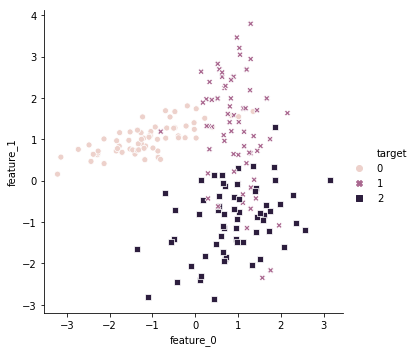

In [14]:
sns.relplot(
    x='feature_0', y='feature_1', hue='target', style='target', data=dataset)
plt.show()

Try different palettes until you find find a suitable one then remove this comment. Available palettes on the lecture development machine were: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r.

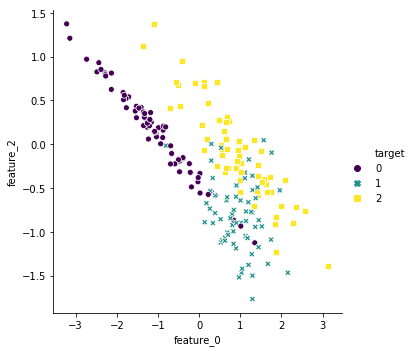

In [15]:
sns.relplot(
    x='feature_0', y='feature_2', hue='target', style='target', palette='viridis', data=dataset)
plt.show()

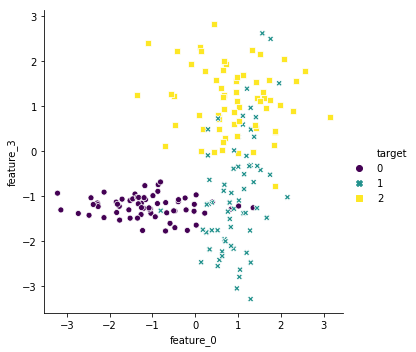

In [16]:
sns.relplot(
    x='feature_0', y='feature_3', hue='target', style='target', palette='viridis', data=dataset)
plt.show()

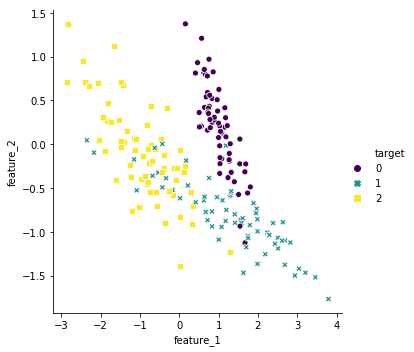

In [17]:
sns.relplot(
    x='feature_1', y='feature_2', hue='target', style='target', palette='viridis', data=dataset)
plt.show()

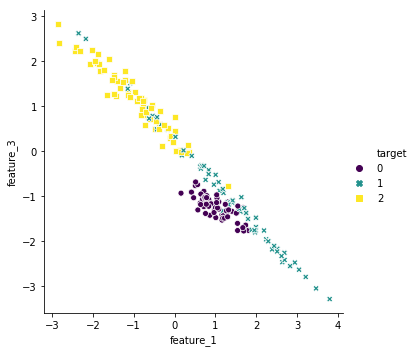

In [18]:
sns.relplot(
    x='feature_1', y='feature_3', hue='target', style='target', palette='viridis', data=dataset)
plt.show()

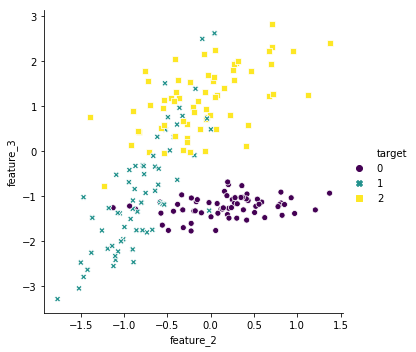

In [19]:
sns.relplot(
    x='feature_2', y='feature_3', hue='target', style='target', palette='viridis', data=dataset)
plt.show()

In [20]:
training_features, test_features, training_target, test_target = train_test_split(
    features, target, random_state=0)

In [21]:
print(training_features.shape, test_features.shape)

(150, 4) (50, 4)


In [22]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
model = dtc.fit(training_features, training_target)

In [24]:
predictions = model.predict(test_features)

In [25]:
matrix = confusion_matrix(test_target, predictions)

In [26]:
print(matrix)

[[12  2  0]
 [ 0 11  5]
 [ 0  2 18]]


In [27]:
print(classification_report(test_target, predictions))

             precision    recall  f1-score   support

          0       1.00      0.86      0.92        14
          1       0.73      0.69      0.71        16
          2       0.78      0.90      0.84        20

avg / total       0.83      0.82      0.82        50



In [28]:
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=feature_names)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')

True

![Decision Tree](decision_tree.png)